## Problem 1

In [37]:
# BRUH disease
# non-fatal
total_bison = 100000
# typical bison lifespan is 100 weeks
nu = 1/100
# typical infection lasts 2 weeks
gamma = 1/2
# duration of infection is exponentially distributed

# ecologists believe they are only identifying 10%of cases due to lack of funds
# this 10% varies from week to week

# of 1000 bison sampled, only 7 had hiccups
pos_sample = 7/1000
# blood samples from 1000 bison showed that 517 had BRUH antibodies
seroprevalence = 517/1000

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Part a

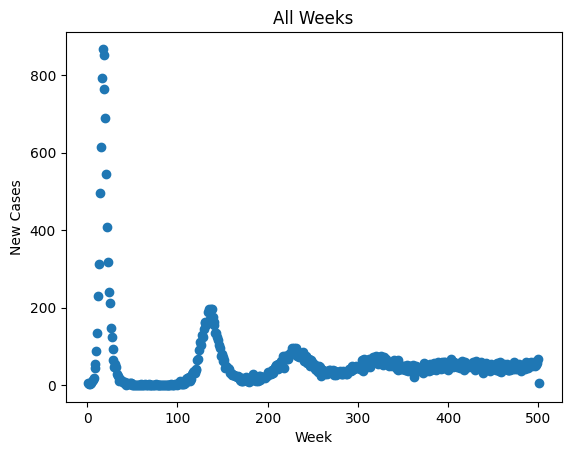

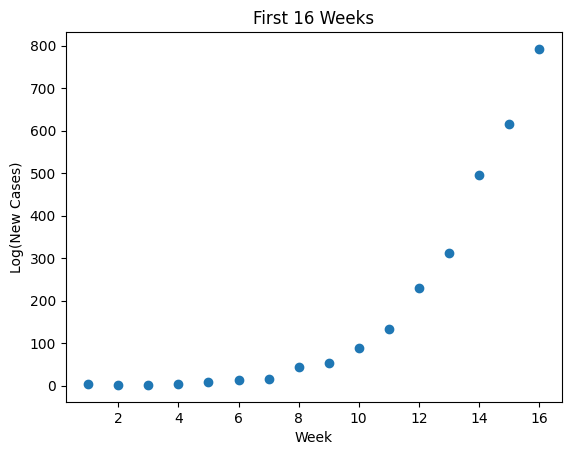

In [39]:
# Estimate R0 by examining the period of exponential growth
# Method 1: Estimating R0 from epidemic growth data

# assuming that one bison is initially infected to cause other infections

# to estimate beta, go through data to calculate the rate susceptibles become infected
bisondata = pd.read_csv("./Data/HW4_all_weeks.csv")

# plotting new cases against weeks
plt.scatter(bisondata['Week'], bisondata['New Cases'])
plt.xlabel('Week')
plt.ylabel('New Cases')
plt.title('All Weeks')
plt.show()

# the period of exponential growth looks to be until week 16
bisondata_exp = bisondata[:16]
X = bisondata_exp['Week']
y = bisondata_exp['New Cases']
Y = np.log(bisondata_exp['New Cases'])
plt.scatter(X, y)
plt.xlabel('Week')
plt.ylabel('Log(New Cases)')
plt.title('First 16 Weeks')
plt.show()

0.9727193287391513
0.04825660610904414
[0.43093729]


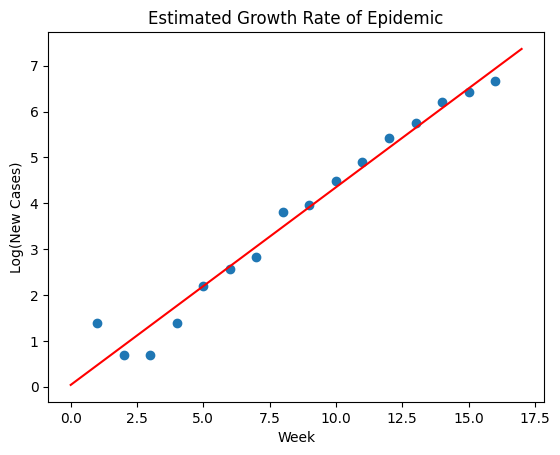

In [40]:
# performing linear regression to find the slope of the above graph
model = LinearRegression()

X = pd.DataFrame(X)
y = pd.DataFrame(Y)

model.fit(X, Y)
r_sq = model.score(X, Y)
print(r_sq)
print(model.intercept_)
print(model.coef_)

# let's plot this on top of the log plot
x = np.linspace(0, 17, 100)
y = 0.04 + 0.431*x
# plotting on a log y-axis
plt.scatter(X, Y)
plt.plot(x, y, color='red')
plt.xlabel('Week')
plt.ylabel("Log(New Cases)")
plt.title('Estimated Growth Rate of Epidemic')
plt.show()

In [42]:
# now, we know that our slope is 0.431 over this exponential window
m_hat = 0.431
R0 = 1 + m_hat/(gamma + nu)
print(R0)

1.8450980392156864


In [46]:
# the confidence interval 
from scipy.stats import t

# computing the standard error of the slope
# X = X['Week']
x = np.asarray(X).ravel()
y = np.asarray(Y).ravel()
xbar = x.mean()
intercept = float(model.intercept_)
slope = float(model.coef_[0])

yhat = intercept + slope*x
residuals = y - yhat

n = len(x)
stdErr = np.sqrt(np.sum(residuals**2) / (n-2)) / np.sqrt(np.sum((x - xbar)**2))

tcrit = t.ppf(0.975, df=n-2)

CI_low = slope - tcrit * stdErr
CI_high = slope + tcrit * stdErr
print("Confidence interval for slope - low: ", CI_low)
print("Confidence interval for slope - high: ", CI_high)
print(slope)

# plugging this into the R0 calculation
R0high = 1 + CI_high/(gamma + nu)
print("R0 high end: ", R0high)

R0low = 1 + CI_low/(gamma + nu)
print("R0 low end: ", R0low)

Confidence interval for slope - low:  0.3895689681118168
Confidence interval for slope - high:  0.4723056146348798
0.4309372913733483
R0 high end:  1.9260894404605486
R0 low end:  1.763860721787876


### Part b

In [47]:
# Method 4: Estimating R0 from seroprevalence
R0 = 1/(1 - seroprevalence)
print(R0)

SE = np.sqrt(seroprevalence * (1 - seroprevalence)) / 1000

R0low = R0 - (1.96*SE)
R0high = R0 + (1.96*SE)
print(1.96*SE)
print(R0low)
print(R0high)


2.070393374741201
0.0009794333962041522
2.0694139413449966
2.071372808137405


### Part c

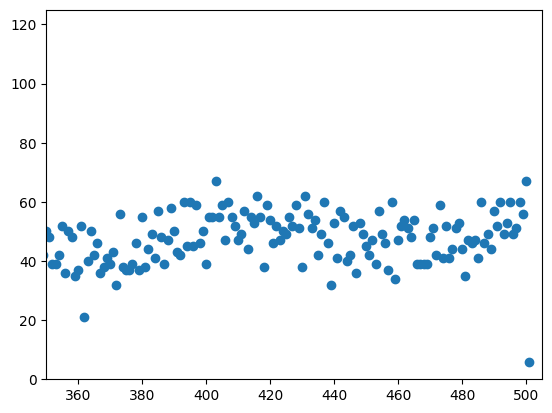

953.2450331125827
0.009532450331125828
1.946112029034445
1.893268750873693
2.001989835991039


In [54]:
# finding iequilibrium to estimate R0
plt.scatter(bisondata['Week'], bisondata['New Cases'])
plt.xlim(350, 505)
plt.ylim(0, 125)
plt.show()

bisondata_eq = bisondata[350:]
n = len(bisondata_eq)
sd = bisondata_eq['New Cases'].std(ddof=1)
stdErr = sd / np.sqrt(n)
tcrit = t.ppf(0.975, df=n-1)

mean_incidence = bisondata_eq['New Cases'].mean()
mean_low = mean_incidence - tcrit*stdErr
mean_high = mean_incidence + tcrit*stdErr

duration = 2 # 2 week
# I_eq_true * 10% = I_eq_obs
I_eq = mean_incidence / 0.1 * 2 # multiplying by the duration
Ilow = mean_low / 0.1 * 2
Ihigh = mean_high / 0.1 * 2
print(I_eq)

i_eq = I_eq/total_bison
ilow = Ilow/total_bison
ihigh = Ihigh/total_bison
print(i_eq)

R0 = 1/(1 - i_eq*((gamma/nu) + 1))
R0low = 1/(1 - ilow*((gamma/nu) + 1))
R0high = 1/(1 - ihigh*((gamma/nu) + 1))
print(R0)
print(R0low)
print(R0high)